[View in Colaboratory](https://colab.research.google.com/github/Kaliostrogoblin/GRID-2018-Workshop/blob/master/Deep_learning_workshop.ipynb)

# Deep Learning for beginners with exciting example of computing poetry

## Deep learning libraries

There are a plenty of various frameworks for applying deep learning. Some of them you can see on the picture below.

![Hello](https://www.analyticsindiamag.com/wp-content/uploads/2018/04/all_libraries.png =600x250)

But we will focus only on two very common libraries:


*   [TensorFlow](https://www.tensorflow.org/)
*   [Keras](https://keras.io/)

**TensorFlow** is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.

**Keras** is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. *Being able to go from idea to result with the least possible delay is key to doing good research.*

**In January 2017 Keras became a part of TensorFlow library.**



## Let's see, how easy to create a deep convolutional network with the help of Keras. 

We will learn how to classify [handwritten digits](http://yann.lecun.com/exdb/mnist/) using deep convnet.

In [0]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# specify a number of output classes
# MNIST data has ten categories, each means particular digit
N_CLASSES  = 10

### Load and preprocess MNIST data¶

Data splitted in two sets - train and test

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() 
 
print('Train size: {:5}'.format(len(X_train)))
print('Test size: {:6}'.format(len(X_test)))

11493376/11490434 [==============================] - 7s 1us/step
Train size: 60000
Test size:  10000


Rescale original image data to be in range [0, 1]

In [0]:
# before rescaling
print('X_max before rescaling - {}'.format(X_train.max()))

X_train_rescaled = X_train / 255.
X_test_rescaled  = X_test / 255.
# after rescaling
print('X_max after rescaling  - {}'.format(X_train_rescaled.max()))

# and reshape for convolutional neural network
# each image should be 3D tensor: 28x28x1
X_train_rescaled = X_train_rescaled[:, :, :, np.newaxis]
X_test_rescaled = X_test_rescaled[:, :, :, np.newaxis]

X_max before rescaling - 255
X_max after rescaling  - 1.0


Show one training example

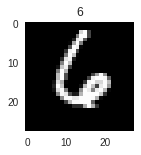

In [0]:
# randomly choose index of the image to show
i = np.random.randint(0, 9999)

plt.figure(1, figsize=(2, 2))
plt.imshow(X_test_rescaled[i].reshape((28, 28)))
plt.title(y_test[i])
plt.grid(False)
plt.gray()
plt.show()

Represent categorical labels as one-hot vectors

For example, imagine that we have ten classes of data samples. So for the label equals to 3 one-hot vector would be:

```python
0 0 0 1 0 0 0 0 0 0
```

This transformation is nessesary for computing categorical cross-entropy loss:

$$L = -\sum_{i}^N{L_i \log{(S_i)}}$$

Where $S$ is output from Softmax Layer and $L$ is Labels

In [0]:
y_train_categorical = to_categorical(y_train, num_classes=N_CLASSES)
y_test_categorical  = to_categorical(y_test, num_classes=N_CLASSES)


### Build convolutional classifier

In [0]:
ConvNN = Sequential()

# 32 means the number of filters, features
# (3,3) is tuple represents the filters sizes, e.g. each filter is a square with size 3x3
# padding='same' - we add zeros across each of edges of the input sample
# (28, 28, 1) - input shape, where 1 is a single gray channel (we may have RGB images with shape = 28,28,3)
ConvNN.add(Conv2D(32, (5,5), input_shape=(28, 28, 1), activation='relu'))
ConvNN.add(MaxPool2D(pool_size=(2,2)))
ConvNN.add(Conv2D(64, (5,5), padding='same', activation='relu'))
ConvNN.add(MaxPool2D(pool_size=(2,2)))
ConvNN.add(Flatten()) # operation that flattens input tensor
ConvNN.add(Dense(1024, activation='relu'))
ConvNN.add(Dense(N_CLASSES, activation='softmax'))

# compile model
ConvNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print model
ConvNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2360320   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total para

In [0]:
print('Training')
ConvNN.fit(
    X_train_rescaled, 
    y_train_categorical, 
    epochs=5, 
    validation_data=(X_test_rescaled, y_test_categorical)
)

Training
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 407us/step - loss: 0.0962 - acc: 0.9697 - val_loss: 0.0313 - val_acc: 0.9908
Epoch 2/5
60000/60000 [==============================] - 23s 381us/step - loss: 0.0353 - acc: 0.9889 - val_loss: 0.0282 - val_acc: 0.9900
Epoch 3/5
60000/60000 [==============================] - 23s 381us/step - loss: 0.0248 - acc: 0.9922 - val_loss: 0.0307 - val_acc: 0.9905
Epoch 4/5
60000/60000 [==============================] - 23s 380us/step - loss: 0.0168 - acc: 0.9948 - val_loss: 0.0339 - val_acc: 0.9913
Epoch 5/5
60000/60000 [==============================] - 23s 381us/step - loss: 0.0154 - acc: 0.9951 - val_loss: 0.0285 - val_acc: 0.9923


### Evaluate our classifier

In [0]:
#Convolutional Network
acc = ConvNN.evaluate(X_test_rescaled, y_test_categorical)[1]
acc *= 100
print('ConvNN accuracy: {:.2f}%'.format(acc))

10000/10000 [==============================] - 1s 114us/step
ConvNN accuracy: 99.23%


## How it works? 

As you know every neural network even the deepest one is a very complex differentiable function, training of which consists of finding optimal weight values. This can be done via performing gradient descent optimization procedure, which requires computing of derivative of the loss function with respect to weights.

**How to compute a derivative of such complex function?**

### The composite function rule

If $y$ is a function of $u$ and $u$ is a function of $x$ then

$$\frac{dy}{dx}=\frac{dy}{du} \times \frac{du}{dx}$$

**Example**:   
if $y = (z^3 + 4z^2 − 3z − 3)^{−6}$,

then set $u = z^3 + 4z^2 − 3z − 3$ so that $y = u^{−6}$ and

$$\frac{dy}{dx}=\frac{dy}{du} \times \frac{du}{dx}=−6u^{−7} × (3z^2 + 8z − 3)$$

The most convenient representation in the form of a composition is a representation in the form of a **graph of computations.** 

Let's see, how to represent the function 

$$e=(a+b)∗(b+1)$$ 

To create a computational graph, we make each of these operations, along with the input variables, into nodes. When one node’s value is the input to another node, an arrow goes from one to another.

![computation_graph](http://colah.github.io/posts/2015-08-Backprop/img/tree-eval.png =350x200)

### Derivatives on Computational Graphs

If one wants to understand derivatives in a computational graph, the key is to understand derivatives on the edges.

![derivatives_on_computation_graph](http://colah.github.io/posts/2015-08-Backprop/img/tree-eval-derivs.png =450x290)

And to get the derivative of e with respect to b we obtain:

$$e=(a+b)∗(b+1), \frac{de}{db}=1∗2+1∗3$$

**To explore this question read a [blog-post](http://colah.github.io/posts/2015-08-Backprop/) about "Calculus on Computational Graphs".**

## Language Modeling or how to train a neural network writing lyrics

**Note: this example is retrieved from very exciting [russian book](https://www.litres.ru/a-kadurin-13464223/glubokoe-obuchenie-pogruzhenie-v-mir-neyronnyh-29817855/) about deep learning.**

Target function in such kind of problems is to predict how a text will go on. 

The idea is very simple: **let's try to generate the text letter by letter** treating it simply as a stream of symbols.

Then the task of language modeling is very easily formalized: **we would like to predict the next character from the previous text.**

We will use a recurrent neural network as a natural way to work with sequential data. The input is a cutted sentence and the output is the next character in this sentence. So we need to solve the **classification problem with multiple classes.**

### Clone the repository with training data

In [0]:
!git clone https://github.com/Kaliostrogoblin/GRID-2018-Workshop.git

Cloning into 'GRID-2018-Workshop'...
remote: Counting objects: 13, done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 1), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


Import some libraries and define constants.

In [0]:
import nltk
nltk.download('punkt')

# sentence tokenizer
from nltk.tokenize import sent_tokenize
# for pretty formatted output
from pprint import pprint
import numpy as np
import os

input_fname = 'GRID-2018-Workshop/data/evgeniy_onegin.txt'
output_fname = 'sampling.log'

RANDOM_STATE = 13

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Create a dictionary of characters

The problem is to predict the next character with respect to the input, but a neural networks don't understand a textual data. We have to translate each character into integer identifier. For convenience we will use a dictionary of characters.

In [0]:
START_CHAR = '\b'
END_CHAR = '\t'
PADDING_CHAR = '\a'

chars = set([START_CHAR, '\n', END_CHAR])
print("Initial set of chars:", chars)

# read file for getting input chars
print("Getting chars set...")
with open(input_fname) as f:
    for line in f:
        # add new chars to the set
        chars.update(list(line.strip().lower()))

print("Creating dictionary of chars...")
char_indices = {c : i for i, c in enumerate(sorted(list(chars)))}
# add specific `PADDING CHAR` 
char_indices[PADDING_CHAR] = 0
indices_to_chars = {i : c for c, i in char_indices.items()}
num_chars = len(chars)
print("Size of the chars dictionary:", num_chars)
print("Dictionary of chars:")
pprint(char_indices)

Initial set of chars: {'\x08', '\t', '\n'}
Getting chars set...
Creating dictionary of chars...
Size of the chars dictionary: 72
Dictionary of chars:
{'\x07': 0,
 '\x08': 0,
 '\t': 1,
 '\n': 2,
 ' ': 3,
 '!': 4,
 '"': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 ':': 12,
 ';': 13,
 '?': 14,
 'a': 15,
 'b': 16,
 'c': 17,
 'd': 18,
 'e': 19,
 'f': 20,
 'g': 21,
 'h': 22,
 'i': 23,
 'k': 24,
 'l': 25,
 'm': 26,
 'n': 27,
 'o': 28,
 'p': 29,
 'q': 30,
 'r': 31,
 's': 32,
 't': 33,
 'u': 34,
 'v': 35,
 'w': 36,
 'x': 37,
 'y': 38,
 'z': 39,
 'а': 40,
 'б': 41,
 'в': 42,
 'г': 43,
 'д': 44,
 'е': 45,
 'ж': 46,
 'з': 47,
 'и': 48,
 'й': 49,
 'к': 50,
 'л': 51,
 'м': 52,
 'н': 53,
 'о': 54,
 'п': 55,
 'р': 56,
 'с': 57,
 'т': 58,
 'у': 59,
 'ф': 60,
 'х': 61,
 'ц': 62,
 'ч': 63,
 'ш': 64,
 'щ': 65,
 'ъ': 66,
 'ы': 67,
 'ь': 68,
 'э': 69,
 'ю': 70,
 'я': 71}


As for MNIST example we need to represent each character's identifier as one-hot vector for classification.

In [0]:
# one_hot vectors creator
def get_one(i, sz):
    res = np.zeros(sz)
    res[i] = 1
    return res

# one_hot vectors for each char
print('Chars one-hot dict...')
char_vectors = {
    c : (
            np.zeros(num_chars) if c == PADDING_CHAR
            else get_one(v, num_chars)
        ) for c, v in char_indices.items()
}
print('One-hot represantation of the `ф` letter:', char_vectors['ф'], '\n')

# Note, that padding char is a vector of zeros!

Chars one-hot dict...
One-hot represantation of the `ф` letter: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



### Read the text as list of sentences

**Note:** that we are reading file twice, because the data has not a very big size, but in real conditions it may be time-consuming.

In [0]:
# read file for getting sentences
with open(input_fname, 'r') as f:
    sentences = sent_tokenize(f.read().lower())
print("Number of sentences:", len(sentences))
print("10-sentence: `%s`" % sentences[10], '\n')

Number of sentences: 1489
10-sentence: `iii

служив отлично благородно,
долгами жил его отец,
давал три бала ежегодно
и промотался наконец.` 



### Preparing dataset

The next step is vectorization. Let's define a function that turns a set of sentences into two tensors: $X$ contains the vectors of the symbols, and $y$ is the result that we need to predict. In fact, it is the same tensor $X$, only shifted one vector to the right. At time $t$ we predict a symbol that will stand in place $t + 1$.

In [0]:
def get_matrices(sentences):
    max_sentence_len = np.max([len(x) for x in sentences])
    X = np.zeros((len(sentences), max_sentence_len, len(chars)), dtype=np.bool)
    y = np.zeros((len(sentences), max_sentence_len, len(chars)), dtype=np.bool)
    for i, sentence in enumerate(sentences):
        char_seq = (START_CHAR + sentence + END_CHAR).ljust(
            max_sentence_len+1, PADDING_CHAR)
        
        for t in range(max_sentence_len):
            X[i, t, :] = char_vectors[char_seq[t]]
            y[i, t, :] = char_vectors[char_seq[t+1]]
            
    return X, y

In [0]:
print('Preparing dataset...')
rs = np.random.RandomState(RANDOM_STATE)
test_indices = rs.choice(len(sentences), int(len(sentences) * 0.05))
sentences_train = [sentences[x]
    for x in set(range(len(sentences))) - set(test_indices)]
sentences_test = [sentences[x] for x in test_indices]
sentences_train = sorted(sentences_train, key=lambda x: len(x))
X_test, y_test = get_matrices(sentences_test)
batch_size = 4
print('N.o. train sentences:', len(sentences_train))
print('Test shape:', X_test.shape, y_test.shape, '\n')

Preparing dataset...
N.o. train sentences: 1416
Test shape: (74, 378, 72) (74, 378, 72) 



We didn't vectorize the train data to not store the whole matrix in memory, but we can create a generator, that will vectorize data in portions. Keras has a special method for training with the help of generators  --  ```fit_generator()```

In [0]:
# batch generator for model training
def generate_batch(data, batch_size):
    while True:
        for i in range(len(data) // batch_size):
            data_batch = data[i*batch_size : (i+1)*batch_size]
            yield get_matrices(data_batch)

### Build Keras model

Do some imports.

In [0]:
# keras model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM, GRU
from keras.layers import TimeDistributed
from keras.layers import Concatenate
from keras.layers import Input
from keras.models import load_model

### Reproducible results

There is a great [blog-post](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/) about neccessarity of getting reproducible results in experiments and how to obtain this reproducibility in Keras.

**Note:** when I was writing this notebook, I forgot about reproducibility. Don't do that!

In [0]:
from numpy.random import seed
seed(RANDOM_STATE)
from tensorflow import set_random_seed
set_random_seed(RANDOM_STATE)

Schematic figure of the model:

![language_model](https://wiki.ubc.ca/images/a/ac/CharLevel.png)

In [0]:
inputs = Input(shape=(None, num_chars))
l1 = GRU(100, activation='tanh', return_sequences=True)(inputs)
l1_d = Dropout(0.3)(l1)
# skip connection
inputs_2 = Concatenate()([inputs, l1_d])
l2 = GRU(100, activation='tanh', return_sequences=True)(inputs_2)
l2_d = Dropout(0.3)(l2)
#concat all outputs
input_d = Concatenate()([l1_d, l2_d])
outputs = TimeDistributed(Dense(num_chars, activation='softmax'))(input_d)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, 72)     0                                            
__________________________________________________________________________________________________
gru_3 (GRU)                     (None, None, 100)    51900       input_2[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, None, 100)    0           gru_3[0][0]                      
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, None, 172)    0           input_2[0][0]                    
                                                                 dropout_3[0][0]                  
__________

Now, when the model is built we have to compile it by defining an optimizer, loss function and evaluation metrics. **Gradients should always be clipped during training of LSTM or GRU, particularly with deep ones.**

In [0]:
# compiling model
# we have to clip gradients in RNN network!
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(clipnorm=1.), 
              metrics=['accuracy'])

### Callbacks

A callback is a set of functions to be applied at given stages of the training procedure. One can use callbacks to get a view on internal states and statistics of the model during training or for saving logs. 

In [0]:
# char sampling callback
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

#### Callback for text sampling

At the output of its last layer, the model generates weights $x_w$ of characters $w$. These weights do not necessarily sum to one and do not necessarily have a sense of probability. The softmax activation function suggests that it is reasonable to choose the probabilities as follows:

$$p(w)\propto e^{-\frac{1}{T}x_w},$$

where $T$ is a **sampling temperature**.

**If $T$ is large**, then the exponents will be small enough in modulus, the results of the exponentiation will not be too large, and the probabilities will be fairly close at the output, that is, **we will sample quite randomly**.

And **if $T$ is small**, then exponents will be large and after exponentiation very small numbers close to zero will be obtained very often. **There will be only few non-zero probabilities. **

**Example:**


```x = [1, 2, 5], T=10.0 =>```  $p\approx (0.39, 0.36, 0.25);$

```x = [1, 2, 5], T=1.0 =>```  $p\approx (0.72, 0.27, 0.01);$

```x = [1, 2, 5], T=10.0 =>```  $p\approx (0.9999, 4 \cdot 10^{-5}, 4 \cdot 10^{-18});$

In [0]:
class CharSampler(Callback):
    def __init__(self, char_vectors, model):
        self.char_vectors = char_vectors
        self.model = model

    def on_train_begin(self, logs={}):
        self.epoch = 0
        if os.path.isfile(output_fname):
            os.remove(output_fname)

    def sample(self, preds, temperature=0.3):
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, preds, 1)
        return np.argmax(probas)

    def sample_one(self, T):
        result = START_CHAR
        while len(result) < 500:
            Xsampled = np.zeros((1, len(result), num_chars))
            
            for t, c in enumerate(list(result)):
                Xsampled[0, t, :] = self.char_vectors[c]

            ysampled = self.model.predict(Xsampled, batch_size=1)[0, :]
            yv = ysampled[len(result)-1, :]
            selected_char = indices_to_chars[self.sample(yv, T)]
            if selected_char == END_CHAR:
                break
            result = ''.join([result, selected_char])
        return result


    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch % 10 == 0:
            print("\nEpoch %d text sampling:" % self.epoch)
            with open(output_fname, 'a') as outf:
                outf.write("\n===== Epoch % d =====\n" % self.epoch)
                for T in [0.3, 0.5, 0.7, 1.0]:
                    print("\tsampling, T = %.1f..." % T)
                    for _ in range(5):
                        self.model.reset_states()
                        res = self.sample_one(T)
                        outf.write("\nT = %.1f\n%s\n" % (T, res[1:]))

In [0]:
cb_sampler = CharSampler(char_vectors, model)
cb_logger = CSVLogger(output_fname)

### Training

In [0]:
model.fit_generator(generate_batch(sentences_train, batch_size), 
    steps_per_epoch=int(len(sentences_train) / batch_size) * batch_size,
    epochs=200,
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[cb_logger, cb_sampler]
)

Epoch 1/200
1416/1416 [==============================] - 550s 388ms/step - loss: 1.4420 - acc: 0.5576 - val_loss: 0.4066 - val_acc: 0.1301
Epoch 2/200
1416/1416 [==============================] - 553s 391ms/step - loss: 1.4293 - acc: 0.5619 - val_loss: 0.4138 - val_acc: 0.1287
Epoch 3/200
1416/1416 [==============================] - 555s 392ms/step - loss: 1.4214 - acc: 0.5630 - val_loss: 0.4190 - val_acc: 0.1273
Epoch 4/200
1416/1416 [==============================] - 548s 387ms/step - loss: 1.4158 - acc: 0.5648 - val_loss: 0.4233 - val_acc: 0.1259
Epoch 5/200
1416/1416 [==============================] - 546s 385ms/step - loss: 1.4101 - acc: 0.5665 - val_loss: 0.4270 - val_acc: 0.1247
Epoch 6/200
1416/1416 [==============================] - 545s 385ms/step - loss: 1.4071 - acc: 0.5668 - val_loss: 0.4306 - val_acc: 0.1242
Epoch 7/200
1416/1416 [==============================] - 549s 388ms/step - loss: 1.4054 - acc: 0.5675 - val_loss: 0.4352 - val_acc: 0.1227
Epoch 8/200
1416/1416 [====

KeyboardInterrupt: ignored

### Sampling results

In [0]:
!cat sampling.log


===== Epoch  10 =====

T = 0.3
как мне подумала с своей.

T = 0.3
xxxviii

привечный тай разделья старой
и стром в сердце в самом порой,
и все своей сердце венец,
не постели по дворанье,
и в сердце прикрасной не полет,
и с ней на скоро не старина,
не полной достойный без глас,
и с постихо уж он меня летой
и все столи простовой строманный,
не полной достих и следит странный,
все не в полной достой своей,
и взор наш его в сосед света
пред ней светремение славы
не полною долгой только,
в сердце привезденье на света,
и с нет на при соловить и след.

T = 0.3
xxxviii

все дево владительный расно
и волненье старины красе
к моей мертвенных молесть мог,
и все стороне, слез обратя,
с семиной света в самом доме;
и все столка за нем она.

T = 0.3
все тихо.

T = 0.3
xxxviii..

T = 0.5
довольно.

T = 0.5
где вы?".

T = 0.5
ужели он?..".. - "я не могодь
и пора за велишь в немой
в столах молковать одна свой,
на простой не грустно уж ранный,
и слез в предуков угордая строй
погла с поли приновал,
стары

### Save and upload model to Google Drive

Let's simply save the model. **Note that we are saving model structure with weights and optimizer state for continue of training.** If you want to save only weights or only a structure, follow the [link](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) to learn how to do that.

In [0]:
model.save('pushkin_gru_60.h5')

Next we will define some functions for loading and uploading files to GDrive.

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def upload_model_to_gdrive(model_name):
    # Create & upload a file.
    uploaded = drive.CreateFile({'title': model_name})
    uploaded.SetContentFile(model_name)
    uploaded.Upload()
    print('Uploaded file with ID {}'.format(uploaded.get('id')))
    
def download_file_from_gdrive(file_name, id_file):
    downloaded = drive.CreateFile({'id': id_file})
    # fetch content
    downloaded.FetchContent()
    # save content to file on the disk
    import shutil
    downloaded.content.seek(0)
    with open(file_name, 'wb') as f:
        shutil.copyfileobj(downloaded.content, f, length=131072)
    print("File `{}` was successfully loaded".format(file_name))

In [0]:
download_file_from_gdrive('pushkin_gru.h5', '1CwqqC2TAoA7Jz4cF1mJIrEsZbjwzsaoO')
model = load_model('pushkin_gru.h5')

File `pushkin_gru.h5` was successfully loaded


In [0]:
upload_model_to_gdrive('sampling.log')

Uploaded file with ID 1RhvlqTGwtDR6FIM-aBtD0UAGExACFD7Z


## Useful Links



*   [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
*   [Practical Deep Learning For Coders](http://course.fast.ai/)
*   [open Machine Learning course](https://github.com/Yorko/mlcourse.ai)
*   [Deep Learning Specialization (Coursera)](https://www.deeplearning.ai/)
*   [CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/)
*   [Speech and Language Processing (book)](https://web.stanford.edu/~jurafsky/slp3/)
*   [Глубокое обучение. Погружение в мир нейронных сетей (book)](https://www.litres.ru/a-kadurin-13464223/glubokoe-obuchenie-pogruzhenie-v-mir-neyronnyh-29817855/)

